# DATASETS ANALYSIS AND VISUALIZATION NOTEBOOK

In [1]:
import os
from pathlib import Path

# Data processing
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' --> disables the false positive warning for orverwriting a dataframe when using inplace while droping columns
from sklearn.discriminant_analysis import StandardScaler
import numpy as np

# Data plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches #For the dummy legends

# Dimensionality reduction
from sklearn.decomposition import PCA

## IMPORT DATA
Concat probe information horitzontally

In [2]:
## IMPORT DATASET ##

probes = ["GSL", "NPL", "LTL", "AAL", "MAL", "SNA", "PNA", "WGA"] #HIERARCHICAL INDEX

#cellType1
path = "D:/LectinPAINT_Leukemia/20230811_Sugars_KG1/resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes]) #Read and append features csv horitzontally

#cellType2
path = "D:/LectinPAINT_Leukemia/20230814_Sugars_HL60/resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat([dataset, pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes])], ignore_index=True) #Read and append features csv horizontally and append the cell type to the previous dataframe vertically

#celltype3
path = "D:/LectinPAINT_Leukemia/20230815_Sugars_Kasumi1/resultsCris_withTau/cellInformation"
filenames = os.listdir(path) #Read filenames in path
dataset = pd.concat([dataset, pd.concat((pd.read_csv(path + '/' + f) for f in filenames), axis=1, keys=probes, levels=[probes])], ignore_index=True) #Read and append features csv horizontally and append the cell type to the previous dataframe vertically

#### COLOR PALETTE ####
colorDictPre = {2:'#D0A7D6', 1:'#7099D1', 3:'#E9C61D'}
colorDict = {'HL-60':'#D0A7D6', 'KG-1':'#7099D1', 'Kasumi-1':'#E9C61D'}


## View dataset
dataset

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
145         3                0.309949                  0.297079   
146         3                0.314384                  0.305396   
147         3                0.289976                  0.263042   
148         3                0.368681                  0.346678   
149         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
145               0.198283            0.298790                  0.25   
146               0.209995            0.296650                  0.25   
147               0.204673            0.299006                  0.25   
148               0.232413            0.295987                  0.25   
149               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
145           0.144070                             1.133024   
146           0.141708                             1.078994   
147           0.149733                             1.089057   
148           0.137245                             1.193113   
149           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
145                               1.134554   
146                               1.105909   
147                               1.074818   
148                               1.225380   
149                               1.105619   

                                         ...                      WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Median   
0                              0.417871  ...                 0.437734   
1                              0.438082  ...                 0.449149   
2                              0.438300  ...                 0.467471   
3                              0.427424  ...                 0.450430   
4                              0.403632  ...                 0.448021   
..                                  ...  ...                      ...   
145                            0.444352  ...                 0.453428   
146                            0.400612  ...                 0.456115   
147                            0.435658  ...        

In [3]:
dataset.columns # Show columns

MultiIndex([('GSL',                               'Cell type'),
            ('GSL',                 'Track displacement_Mean'),
            ('GSL',               'Track displacement_Median'),
            ('GSL',                  'Track displacement_STD'),
            ('GSL',                     'Track duration_Mean'),
            ('GSL',                   'Track duration_Median'),
            ('GSL',                      'Track duration_STD'),
            ('GSL',    'Mean Directionality Change Rate_Mean'),
            ('GSL',  'Mean Directionality Change Rate_Median'),
            ('GSL',     'Mean Directionality Change Rate_STD'),
            ...
            ('WGA',                'Confinement Ratio_Median'),
            ('WGA',                   'Confinement Ratio_STD'),
            ('WGA',           'Mean Straight Line Speed_Mean'),
            ('WGA',         'Mean Straight Line Speed_Median'),
            ('WGA',            'Mean Straight Line Speed_STD'),
            ('WGA',   'L

## PRE-PROCESS DATA

Drop columns, cut outliers, calculate other features... adapt the cells to your own dataset.
Create your own color palette by using a dictionary with sampleName:color (as in the examples)

In [4]:
## Remove NaN values --> cells for which the Tau couldn't be fitted ##
dataset.dropna(ignore_index=True, inplace=True)
dataset

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
138         3                0.309949                  0.297079   
139         3                0.314384                  0.305396   
140         3                0.289976                  0.263042   
141         3                0.368681                  0.346678   
142         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
138               0.198283            0.298790                  0.25   
139               0.209995            0.296650                  0.25   
140               0.204673            0.299006                  0.25   
141               0.232413            0.295987                  0.25   
142               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
138           0.144070                             1.133024   
139           0.141708                             1.078994   
140           0.149733                             1.089057   
141           0.137245                             1.193113   
142           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
138                               1.134554   
139                               1.105909   
140                               1.074818   
141                               1.225380   
142                               1.105619   

                                         ...                      WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_Median   
0                              0.417871  ...                 0.437734   
1                              0.438082  ...                 0.449149   
2                              0.438300  ...                 0.467471   
3                              0.427424  ...                 0.450430   
4                              0.403632  ...                 0.448021   
..                                  ...  ...                      ...   
138                            0.444352  ...                 0.453428   
139                            0.400612  ...                 0.456115   
140                            0.435658  ...        

### ADD LABEL COLUMN

In [5]:
datasetL = dataset # Backup the original dataset
datasetL['label'] = datasetL['AAL']['Cell type'] #Save the label in a new column, key index in level 0 (parent) | cell code (1 = KG-1, 2 = HL-60, 3= Kasumi-1)
datasetL

GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
138         3                0.309949                  0.297079   
139         3                0.314384                  0.305396   
140         3                0.289976                  0.263042   
141         3                0.368681                  0.346678   
142         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
138               0.198283            0.298790                  0.25   
139               0.209995            0.296650                  0.25   
140               0.204673            0.299006                  0.25   
141               0.232413            0.295987                  0.25   
142               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
138           0.144070                             1.133024   
139           0.141708                             1.078994   
140           0.149733                             1.089057   
141           0.137245                             1.193113   
142           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
138                               1.134554   
139                               1.105909   
140                               1.074818   
141                               1.225380   
142                               1.105619   

                                         ...                   WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_STD   
0                              0.417871  ...              0.264786   
1                              0.438082  ...              0.258320   
2                              0.438300  ...              0.260577   
3                              0.427424  ...              0.258345   
4                              0.403632  ...              0.260771   
..                                  ...  ...                   ...   
138                            0.444352  ...              0.289888   
139                            0.400612  ...              0.293088   
140                            0.435658  ...              0.294029   
141         

In [6]:
datasetL.loc[ datasetL['label'] == 1, 'label'] = 'KG-1' #Change cell code for the corresponding cell type
datasetL.loc[ datasetL['label'] == 2, 'label'] = 'HL-60' #Change cell code for the corresponding cell type
datasetL.loc[ datasetL['label'] == 3, 'label'] = 'Kasumi-1' #Change cell code for the corresponding cell type
datasetL

C:\Users\20210014\AppData\Local\Temp\ipykernel_27696\1523501150.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KG-1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datasetL.loc[ datasetL['label'] == 1, 'label'] = 'KG-1' #Change cell code for the corresponding cell type


GSL                                                    \
    Cell type Track displacement_Mean Track displacement_Median   
0           1                0.333650                  0.296120   
1           1                0.311343                  0.283877   
2           1                0.275025                  0.251956   
3           1                0.271703                  0.238662   
4           1                0.289683                  0.261958   
..        ...                     ...                       ...   
138         3                0.309949                  0.297079   
139         3                0.314384                  0.305396   
140         3                0.289976                  0.263042   
141         3                0.368681                  0.346678   
142         3                0.313570                  0.292613   

                                                                      \
    Track displacement_STD Track duration_Mean Track duration_Median   
0                 0.229119            0.325730                  0.25   
1                 0.196313            0.333119                  0.25   
2                 0.181587            0.314777                  0.25   
3                 0.184877            0.322083                  0.25   
4                 0.176717            0.320911                  0.25   
..                     ...                 ...                   ...   
138               0.198283            0.298790                  0.25   
139               0.209995            0.296650                  0.25   
140               0.204673            0.299006                  0.25   
141               0.232413            0.295987                  0.25   
142               0.220892            0.300906                  0.25   

                                                             \
    Track duration_STD Mean Directionality Change Rate_Mean   
0             0.181326                             1.276963   
1             0.190844                             1.239531   
2             0.138109                             1.217867   
3             0.171728                             1.244892   
4             0.173213                             1.265815   
..                 ...                                  ...   
138           0.144070                             1.133024   
139           0.141708                             1.078994   
140           0.149733                             1.089057   
141           0.137245                             1.193113   
142           0.152724                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
138                               1.134554   
139                               1.105909   
140                               1.074818   
141                               1.225380   
142                               1.105619   

                                         ...                   WGA  \
    Mean Directionality Change Rate_STD  ... Confinement Ratio_STD   
0                              0.417871  ...              0.264786   
1                              0.438082  ...              0.258320   
2                              0.438300  ...              0.260577   
3                              0.427424  ...              0.258345   
4                              0.403632  ...              0.260771   
..                                  ...  ...                   ...   
138                            0.444352  ...              0.289888   
139                            0.400612  ...              0.293088   
140                            0.435658  ...              0.294029   
141         

In [7]:
## Drop non-features columns ##
datasetL = datasetL.drop(['Cell type'], axis=1, level=1) #Drop all label columns in level 1 (children) from the dataframe
datasetL

GSL                                                   \
    Track displacement_Mean Track displacement_Median Track displacement_STD   
0                  0.333650                  0.296120               0.229119   
1                  0.311343                  0.283877               0.196313   
2                  0.275025                  0.251956               0.181587   
3                  0.271703                  0.238662               0.184877   
4                  0.289683                  0.261958               0.176717   
..                      ...                       ...                    ...   
138                0.309949                  0.297079               0.198283   
139                0.314384                  0.305396               0.209995   
140                0.289976                  0.263042               0.204673   
141                0.368681                  0.346678               0.232413   
142                0.313570                  0.292613               0.220892   

                                                                  \
    Track duration_Mean Track duration_Median Track duration_STD   
0              0.325730                  0.25           0.181326   
1              0.333119                  0.25           0.190844   
2              0.314777                  0.25           0.138109   
3              0.322083                  0.25           0.171728   
4              0.320911                  0.25           0.173213   
..                  ...                   ...                ...   
138            0.298790                  0.25           0.144070   
139            0.296650                  0.25           0.141708   
140            0.299006                  0.25           0.149733   
141            0.295987                  0.25           0.137245   
142            0.300906                  0.25           0.152724   

                                          \
    Mean Directionality Change Rate_Mean   
0                               1.276963   
1                               1.239531   
2                               1.217867   
3                               1.244892   
4                               1.265815   
..                                   ...   
138                             1.133024   
139                             1.078994   
140                             1.089057   
141                             1.193113   
142                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
138                               1.134554   
139                               1.105909   
140                               1.074818   
141                               1.225380   
142                               1.105619   

                                                                       ...  \
    Mean Directionality Change Rate_STD Total Distance Travelled_Mean  ...   
0                              0.417871                      0.692964  ...   
1                              0.438082                      0.651272  ...   
2                              0.438300                      0.569758  ...   
3                              0.427424                      0.583840  ...   
4                              0.403632                      0.609073  ...   
..                                  ...                           ...  ...   
138                            0.444352                      0.618370  ...   
139                            0.400612                      0.608552  ...   
140                            0.435658                      0.587116  ...   
141                            0.440300                      0.70544

### Drop extra columns

In [8]:
## Remove density (to test its importance)
dataset_nD = datasetL.drop(['Density'], axis=1, level=1)
dataset_nD #Show dataset

GSL                                                   \
    Track displacement_Mean Track displacement_Median Track displacement_STD   
0                  0.333650                  0.296120               0.229119   
1                  0.311343                  0.283877               0.196313   
2                  0.275025                  0.251956               0.181587   
3                  0.271703                  0.238662               0.184877   
4                  0.289683                  0.261958               0.176717   
..                      ...                       ...                    ...   
138                0.309949                  0.297079               0.198283   
139                0.314384                  0.305396               0.209995   
140                0.289976                  0.263042               0.204673   
141                0.368681                  0.346678               0.232413   
142                0.313570                  0.292613               0.220892   

                                                                  \
    Track duration_Mean Track duration_Median Track duration_STD   
0              0.325730                  0.25           0.181326   
1              0.333119                  0.25           0.190844   
2              0.314777                  0.25           0.138109   
3              0.322083                  0.25           0.171728   
4              0.320911                  0.25           0.173213   
..                  ...                   ...                ...   
138            0.298790                  0.25           0.144070   
139            0.296650                  0.25           0.141708   
140            0.299006                  0.25           0.149733   
141            0.295987                  0.25           0.137245   
142            0.300906                  0.25           0.152724   

                                          \
    Mean Directionality Change Rate_Mean   
0                               1.276963   
1                               1.239531   
2                               1.217867   
3                               1.244892   
4                               1.265815   
..                                   ...   
138                             1.133024   
139                             1.078994   
140                             1.089057   
141                             1.193113   
142                             1.115083   

                                            \
    Mean Directionality Change Rate_Median   
0                                 1.311122   
1                                 1.260877   
2                                 1.233112   
3                                 1.276205   
4                                 1.289361   
..                                     ...   
138                               1.134554   
139                               1.105909   
140                               1.074818   
141                               1.225380   
142                               1.105619   

                                                                       ...  \
    Mean Directionality Change Rate_STD Total Distance Travelled_Mean  ...   
0                              0.417871                      0.692964  ...   
1                              0.438082                      0.651272  ...   
2                              0.438300                      0.569758  ...   
3                              0.427424                      0.583840  ...   
4                              0.403632                      0.609073  ...   
..                                  ...                           ...  ...   
138                            0.444352                      0.618370  ...   
139                            0.400612                      0.608552  ...   
140                            0.435658                      0.587116  ...   
141                            0.440300                      0.70544

## Flatten the multiIndex 

In [9]:
datasetL.columns # Show columns

MultiIndex([(  'GSL',                 'Track displacement_Mean'),
            (  'GSL',               'Track displacement_Median'),
            (  'GSL',                  'Track displacement_STD'),
            (  'GSL',                     'Track duration_Mean'),
            (  'GSL',                   'Track duration_Median'),
            (  'GSL',                      'Track duration_STD'),
            (  'GSL',    'Mean Directionality Change Rate_Mean'),
            (  'GSL',  'Mean Directionality Change Rate_Median'),
            (  'GSL',     'Mean Directionality Change Rate_STD'),
            (  'GSL',           'Total Distance Travelled_Mean'),
            ...
            (  'WGA',                   'Confinement Ratio_STD'),
            (  'WGA',           'Mean Straight Line Speed_Mean'),
            (  'WGA',         'Mean Straight Line Speed_Median'),
            (  'WGA',            'Mean Straight Line Speed_STD'),
            (  'WGA',   'Linearity of Forward Progression_Me

In [10]:
datasetL.columns = ["_".join(a) for a in datasetL.columns.to_flat_index()] #Flatten and rename at the same time to convert from tuple to string
datasetL.columns

Index(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       ...
       'WGA_Confinement Ratio_STD', 'WGA_Mean Straight Line Speed_Mean',
       'WGA_Mean Straight Line Speed_Median',
       'WGA_Mean Straight Line Speed_STD',
       'WGA_Linearity of Forward Progression_Mean',
       'WGA_Linearity of Forward Progression_Median',
       'WGA_Linearity of Forward Progression_STD', 'WGA_Density', 'WGA_Tau',
       'label_'],
      dtype='object', length=353)

In [11]:
dataset_nD.columns = ["_".join(a) for a in dataset_nD.columns.to_flat_index()] #Flatten and rename at the same time to convert from tuple to string
dataset_nD.columns

Index(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       ...
       'WGA_Confinement Ratio_Median', 'WGA_Confinement Ratio_STD',
       'WGA_Mean Straight Line Speed_Mean',
       'WGA_Mean Straight Line Speed_Median',
       'WGA_Mean Straight Line Speed_STD',
       'WGA_Linearity of Forward Progression_Mean',
       'WGA_Linearity of Forward Progression_Median',
       'WGA_Linearity of Forward Progression_STD', 'WGA_Tau', 'label_'],
      dtype='object', length=345)

## Dimensionality Reduction

### Pre-processing

In [12]:
dataset_nD # Show dataset

,GSL_Track displacement_Mean,GSL_Track displacement_Median,GSL_Track displacement_STD,GSL_Track duration_Mean,GSL_Track duration_Median,GSL_Track duration_STD,GSL_Mean Directionality Change Rate_Mean,GSL_Mean Directionality Change Rate_Median,GSL_Mean Directionality Change Rate_STD,GSL_Total Distance Travelled_Mean,...,WGA_Confinement Ratio_Median,WGA_Confinement Ratio_STD,WGA_Mean Straight Line Speed_Mean,WGA_Mean Straight Line Speed_Median,WGA_Mean Straight Line Speed_STD,WGA_Linearity of Forward Progression_Mean,WGA_Linearity of Forward Progression_Median,WGA_Linearity of Forward Progression_STD,WGA_Tau,label_
0,0.333650,0.296120,0.229119,0.325730,0.25,0.181326,1.276963,1.311122,0.417871,0.692964,...,0.437734,0.264786,2.180711,1.068106,5.327635,1.049293,0.394154,3.106816,1.051849e+08,KG-1
1,0.311343,0.283877,0.196313,0.333119,0.25,0.190844,1.239531,1.260877,0.438082,0.651272,...,0.449149,0.258320,1.795647,0.841308,6.301484,0.816499,0.248475,5.570580,4.325341e+07,KG-1
2,0.275025,0.251956,0.181587,0.314777,0.25,0.138109,1.217867,1.233112,0.438300,0.569758,...,0.467471,0.260577,1.825476,1.080394,2.885292,0.828745,0.446775,1.545377,1.074789e+08,KG-1
3,0.271703,0.238662,0.184877,0.322083,0.25,0.171728,1.244892,1.276205,0.427424,0.583840,...,0.450430,0.258345,2.195818,1.024517,8.315743,1.047883,0.377041,4.753284,8.651232e+07,KG-1
4,0.289683,0.261958,0.176717,0.320911,0.25,0.173213,1.265815,1.289361,0.403632,0.609073,...,0.448021,0.260771,2.123591,1.171962,4.498370,1.016223,0.519552,2.335042,1.048598e+08,KG-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.309949,0.297079,0.198283,0.298790,0.25,0.144070,1.133024,1.134554,0.444352,0.618370,...,0.453428,0.289888,3.597320,0.960824,10.707523,2.057368,0.347432,7.676209,5.124273e+03,Kasumi-1
139,0.314384,0.305396,0.209995,0.296650,0.25,0.141708,1.078994,1.105909,0.400612,0.608552,...,0.456115,0.293088,4.297731,1.024653,15.890433,2.464753,0.411528,9.872689,7.374643e+02,Kasumi-1
140,0.289976,0.263042,0.204673,0.299006,0.25,0.149733,1.089057,1.074818,0.435658,0.587116,...,0.437482,0.294029,4.551522,1.163502,17.323316,2.597755,0.515630,10.335101,2.097138e+07,Kasumi-1
141,0.368681,0.346678,0.232413,0.295987,0.25,0.137245,1.193113,1.225380,0.440300,0.705446,...,0.480630,0.309132,5.467752,0.978666,25.822383,3.697008,0.382507,22.444653,5.242717e+06,Kasumi-1


In [13]:
## Set the dataset to use ##
data_toUse = dataset_nD # select __ dataset_nD __ instead when we don't want to use the density or __ datasetL __ when we want to use the Density values
string = 'withoutDensity' # Add to the plot title information on your dataset

In [14]:
## Prepare the dataset for clustering algorithms ##
features = data_toUse.columns.values
features = np.delete(features, -1) #Delete the last element (column 'label')
data = data_toUse.loc[:, features].values # Separating out the features
scaledX = StandardScaler().fit_transform(data) # Standardize data (mean and std is 0)
target = data_toUse.loc[:, 'label_'].values #Separating the label column (sample type)
features # Show features

array(['GSL_Track displacement_Mean', 'GSL_Track displacement_Median',
       'GSL_Track displacement_STD', 'GSL_Track duration_Mean',
       'GSL_Track duration_Median', 'GSL_Track duration_STD',
       'GSL_Mean Directionality Change Rate_Mean',
       'GSL_Mean Directionality Change Rate_Median',
       'GSL_Mean Directionality Change Rate_STD',
       'GSL_Total Distance Travelled_Mean',
       'GSL_Total Distance Travelled_Median',
       'GSL_Total Distance Travelled_STD',
       'GSL_Max Distance Travelled_Mean',
       'GSL_Max Distance Travelled_Median',
       'GSL_Max Distance Travelled_STD', 'GSL_Mean Track Speed_Mean',
       'GSL_Mean Track Speed_Median', 'GSL_Mean Track Speed_STD',
       'GSL_Minimum Track Speed_Mean', 'GSL_Minimum Track Speed_Median',
       'GSL_Minimum Track Speed_STD', 'GSL_Maximum Track Speed_Mean',
       'GSL_Maximum Track Speed_Median', 'GSL_Maximum Track Speed_STD',
       'GSL_Median Track Speed_Mean', 'GSL_Median Track Speed_Median',
       '

In [15]:
## Get unique names for samples
uniqueLabels = list(set(target)) #Get our labels
uniqueLabels = sorted(uniqueLabels)
uniqueLabels # Show labels

['HL-60', 'KG-1', 'Kasumi-1']

In [16]:
data_toUse.groupby("label_").size() # Check (im)balance

label_
HL-60       44
KG-1        49
Kasumi-1    50
dtype: int64

### PCA

In [17]:
# Calculate PCA scores
pcaTotal = PCA()
principalComponents = pcaTotal.fit_transform(scaledX)

In [18]:
pca_df = pd.DataFrame({'pca_1': principalComponents[:,0], 'pca_2': principalComponents[:,1], 'label': target}) # Get the 2 PC for the scatter plot

In [19]:
# Calculate the feature importance based on the loadings
featureImportanceTotal = pd.DataFrame(data=pcaTotal.components_, columns=features)
print(featureImportanceTotal.abs().idxmax(axis=1).head(10))
featureImportanceTotal

0               MAL_Max Distance Travelled_Mean
1      LTL_Mean Directionality Change Rate_Mean
2                     GSL_Mean Track Speed_Mean
3                AAL_Minimum Track Speed_Median
4                  SNA_Minimum Track Speed_Mean
5    NPL_Mean Directionality Change Rate_Median
6     GSL_Linearity of Forward Progression_Mean
7             PNA_Max Distance Travelled_Median
8       AAL_Mean Directionality Change Rate_STD
9                       PNA_Track duration_Mean
dtype: object


,GSL_Track displacement_Mean,GSL_Track displacement_Median,GSL_Track displacement_STD,GSL_Track duration_Mean,GSL_Track duration_Median,GSL_Track duration_STD,GSL_Mean Directionality Change Rate_Mean,GSL_Mean Directionality Change Rate_Median,GSL_Mean Directionality Change Rate_STD,GSL_Total Distance Travelled_Mean,...,WGA_Confinement Ratio_Mean,WGA_Confinement Ratio_Median,WGA_Confinement Ratio_STD,WGA_Mean Straight Line Speed_Mean,WGA_Mean Straight Line Speed_Median,WGA_Mean Straight Line Speed_STD,WGA_Linearity of Forward Progression_Mean,WGA_Linearity of Forward Progression_Median,WGA_Linearity of Forward Progression_STD,WGA_Tau
0,0.051350,0.046520,0.032386,-0.027899,-0.015911,-0.021140,0.020908,0.018981,0.011387,0.031106,...,0.063033,0.065867,-0.003165,-0.046611,-0.080995,0.000909,-0.043987,-0.082475,0.002330,0.001675
1,0.049528,0.011378,0.025621,-0.018259,-0.038038,-0.016657,0.107082,0.108917,0.022496,0.071254,...,0.023877,0.018338,-0.084738,-0.060393,-0.010615,-0.026362,-0.052073,-0.005727,-0.016209,0.073714
2,-0.116284,-0.075527,-0.119824,0.096622,0.074693,0.084826,-0.029661,-0.026571,-0.032009,-0.092790,...,0.057157,0.047145,-0.057452,-0.063498,-0.050282,-0.044833,-0.053104,-0.051334,-0.025758,0.010695
3,0.001372,0.010455,0.006765,0.054821,0.048625,0.051160,0.023431,0.027461,-0.052173,0.034040,...,-0.055185,-0.052338,-0.014978,0.021447,0.068651,-0.018485,0.017028,0.069229,-0.019675,0.003248
4,0.006539,0.002069,-0.010022,0.002276,0.006033,0.013975,0.019546,0.011564,0.015577,0.005430,...,0.015033,0.004094,0.038678,-0.001291,0.008394,0.005517,-0.003143,0.013319,0.004988,-0.041042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.021318,0.100266,-0.058637,-0.013167,-0.007328,-0.055256,0.038920,0.082418,0.019209,-0.011349,...,0.035113,0.089613,-0.072780,-0.032675,0.091026,-0.113020,0.033237,0.032896,0.119240,0.020975
139,-0.024242,-0.075252,0.045829,0.071230,0.042606,-0.002926,-0.000202,-0.065210,-0.024938,0.017989,...,0.027941,0.019848,0.054566,0.065894,0.043715,0.060642,0.046022,-0.039212,-0.106948,0.029665
140,-0.018267,0.056661,0.021350,0.062327,-0.019113,0.012151,-0.025695,-0.042019,0.038791,-0.107295,...,0.033922,0.059566,-0.057655,0.074763,0.018036,0.094393,0.065805,0.013342,-0.163963,0.025701
141,-0.031733,-0.008897,0.015461,-0.000899,0.048502,0.014171,-0.004959,0.080364,0.001267,-0.130946,...,0.077664,0.059163,0.042412,-0.095715,-0.004255,0.070486,0.023154,0.155830,-0.038928,0.009761


In [20]:
featureImportanceTotal.to_csv("pca_featureImportance"+string+".csv") # Save feature importance in a csv

In [21]:
featureImportanceTotal.iloc[0,:].sort_values(ascending=False) # Show ordered feature importance

MAL_Maximum Track Speed_Mean                   0.090165
MAL_Max Distance Travelled_Mean                0.090165
MAL_Median Track Speed_Mean                    0.089790
MAL_Median Track Speed_Median                  0.089230
MAL_Track displacement_Mean                    0.088867
                                                 ...   
LTL_Linearity of Forward Progression_Median   -0.077292
WGA_Mean Straight Line Speed_Median           -0.080995
WGA_Linearity of Forward Progression_Median   -0.082475
MAL_Mean Straight Line Speed_Median           -0.084461
MAL_Linearity of Forward Progression_Median   -0.087048
Name: 0, Length: 344, dtype: float64

In [22]:
topF = featureImportanceTotal.abs().idxmax(axis=1).head(10) # Save top 10 features
topF

0               MAL_Max Distance Travelled_Mean
1      LTL_Mean Directionality Change Rate_Mean
2                     GSL_Mean Track Speed_Mean
3                AAL_Minimum Track Speed_Median
4                  SNA_Minimum Track Speed_Mean
5    NPL_Mean Directionality Change Rate_Median
6     GSL_Linearity of Forward Progression_Mean
7             PNA_Max Distance Travelled_Median
8       AAL_Mean Directionality Change Rate_STD
9                       PNA_Track duration_Mean
dtype: object

In [23]:
featureImportanceTotal[topF].iloc[1,:] # Show top 10 features and their loadings in the PC1 (X axis)

MAL_Max Distance Travelled_Mean              -0.008885
LTL_Mean Directionality Change Rate_Mean      0.131445
GSL_Mean Track Speed_Mean                     0.032277
AAL_Minimum Track Speed_Median               -0.002424
SNA_Minimum Track Speed_Mean                 -0.031064
NPL_Mean Directionality Change Rate_Median    0.057110
GSL_Linearity of Forward Progression_Mean    -0.072569
PNA_Max Distance Travelled_Median            -0.019751
AAL_Mean Directionality Change Rate_STD      -0.029448
PNA_Track duration_Mean                      -0.001479
Name: 1, dtype: float64

In [24]:
loadingsDF = pd.DataFrame({'x':featureImportanceTotal[topF].iloc[0,:], 'y':featureImportanceTotal[topF].iloc[1,:]}) # Create dataframe with the loadings for the simplicity of plotting
loadingsDF

,x,y
MAL_Max Distance Travelled_Mean,0.090165,-0.008885
LTL_Mean Directionality Change Rate_Mean,0.023277,0.131445
GSL_Mean Track Speed_Mean,0.045843,0.032277
AAL_Minimum Track Speed_Median,0.061614,-0.002424
SNA_Minimum Track Speed_Mean,0.073488,-0.031064
NPL_Mean Directionality Change Rate_Median,0.023474,0.057110
GSL_Linearity of Forward Progression_Mean,-0.030558,-0.072569
PNA_Max Distance Travelled_Median,0.056672,-0.019751
AAL_Mean Directionality Change Rate_STD,-0.009138,-0.029448
PNA_Track duration_Mean,-0.018428,-0.001479


In [25]:
loadingsDF.to_csv("pca_top10_PC1-PC2"+string+".csv") # Save top 10 loadings in csv

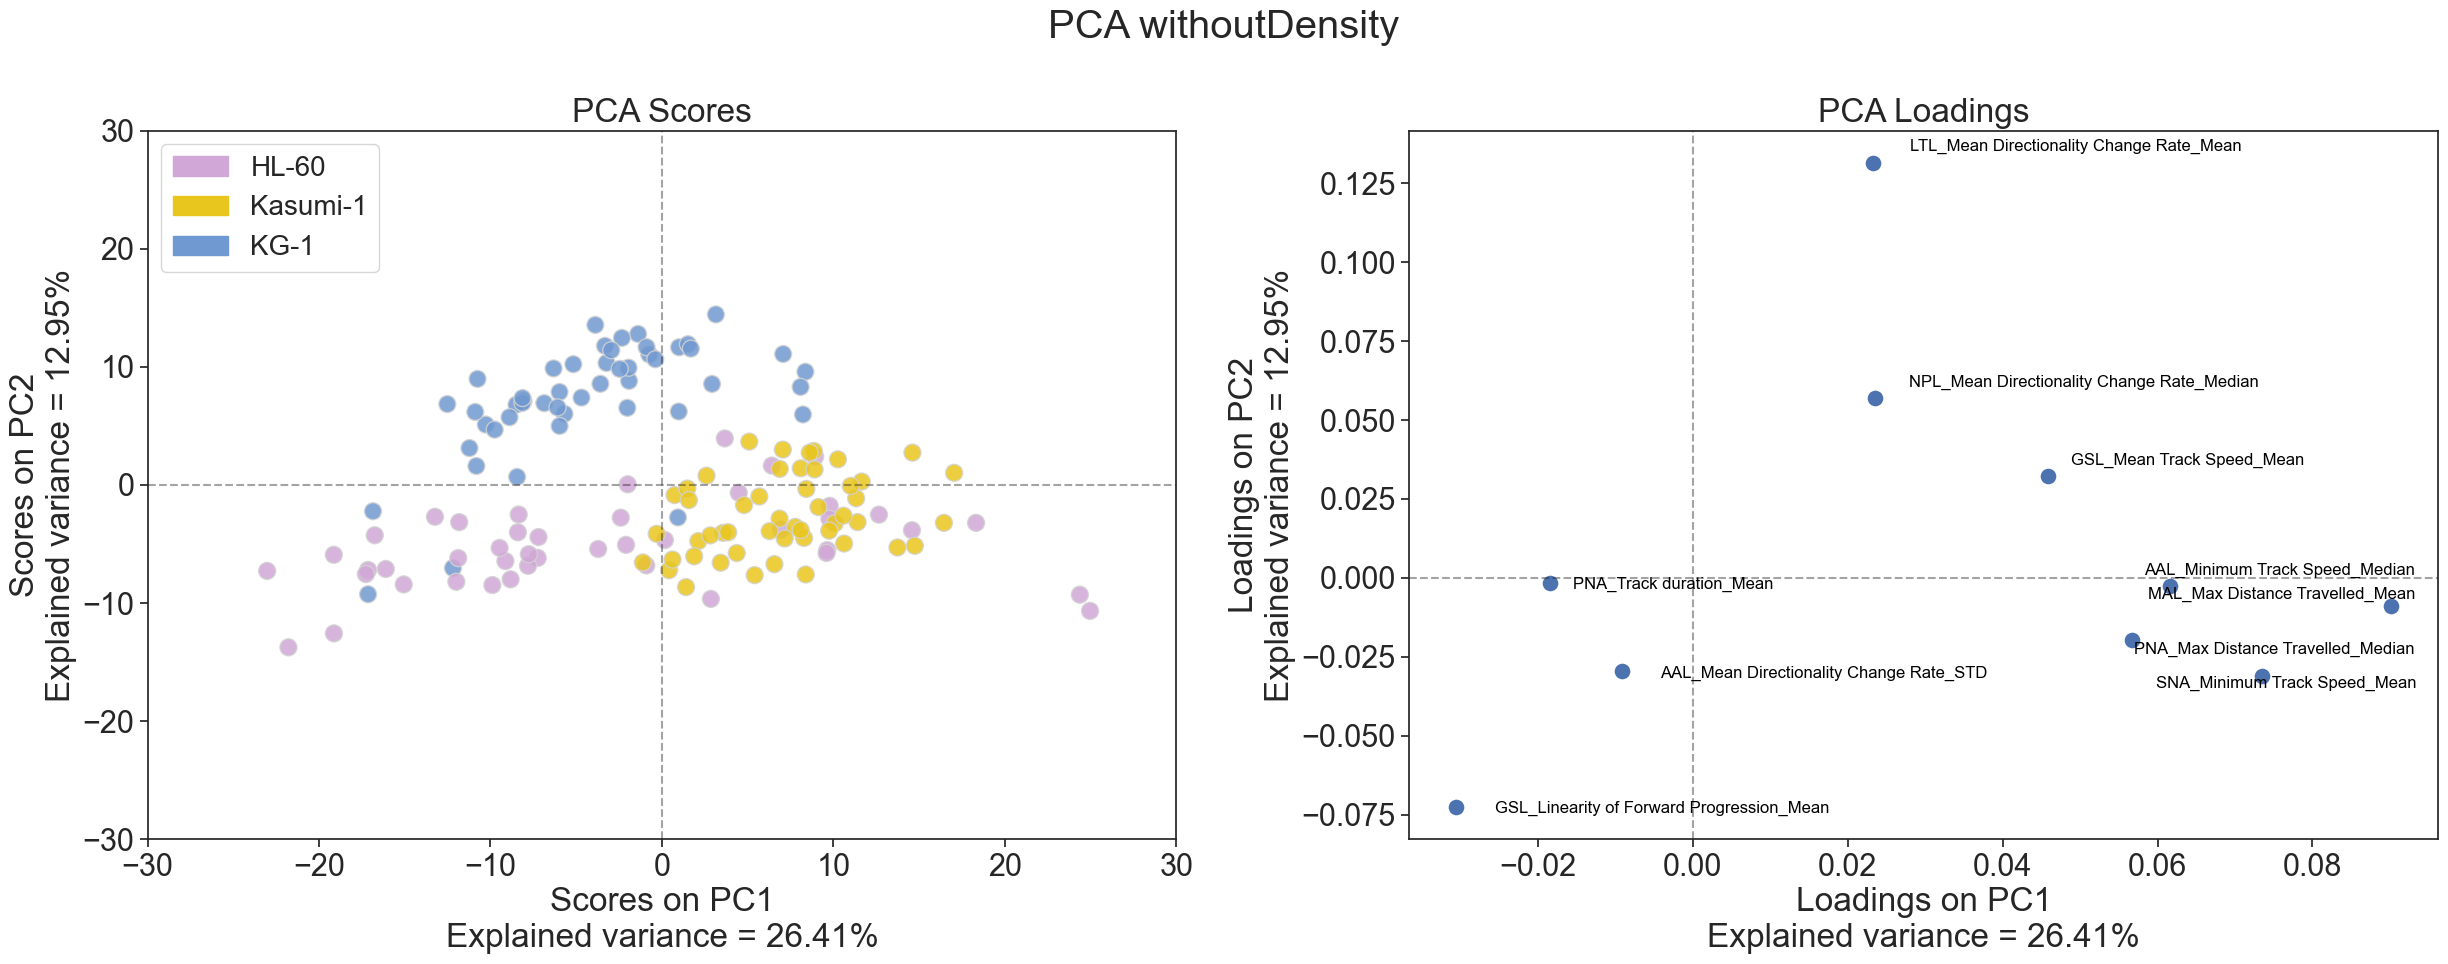

In [29]:
# Generate scores and loadings plot
from adjustText import adjust_text
# Plot the loadings matrix next to the scores
nFeatures = 10 #Features to visualize in the plot
fig, ax = plt.subplots(1,2, figsize=(25,10))

# # Loadings plot
sns.scatterplot(x =loadingsDF.x.head(nFeatures), y = loadingsDF.y.head(nFeatures), data=loadingsDF, ax=ax[1], s=150)
ax[1].title.set_text("PCA Loadings")
ax[1].axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax[1].axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax[1].set_xlabel('Loadings on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
ax[1].set_ylabel('Loadings on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
# ax[1].set_xlim(-1,1)
# ax[1].set_ylim(-1,1)
texts = [plt.text(loadingsDF.iloc[line,0], loadingsDF.iloc[line,1], loadingsDF.index[line], horizontalalignment='left', size=12, color='black') for line in range(nFeatures)] # Add annotation to the loadings
adjust_text(texts) # add arrows to the plot: , arrowprops=dict(arrowstyle='->', color='red'), , only_move='y'

# Scores plot (normal PCA)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='label', palette=colorDict, ax=ax[0], alpha=0.85, s=150, edgecolor='lightgrey')
ax[0].title.set_text("PCA Scores")
ax[0].axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax[0].axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax[0].set_xlabel('Scores on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
ax[0].set_ylabel('Scores on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
ax[0].set_xlim(-30,30)
ax[0].set_ylim(-30,30)

#### forced legend ####
values = ['#D0A7D6', '#E9C61D', '#7099D1']
keys = ['HL-60', 'Kasumi-1', 'KG-1']
patch = [(mpatches.Patch(color=values[i], label=keys[i])) for i in range(len(colorDict))] # Markers are rectangles
ax[0].legend(handles = patch, fontsize=20, loc='upper left') # plot legend
##################################

# plt.suptitle("Dataset without the \"Density\" feature")
plt.suptitle('PCA '+string)


plt.tight_layout()

In [27]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
fig.savefig('PCA'+"/"+'combiplot'+string+".svg", transparent=True, dpi=500, bbox_inches='tight')

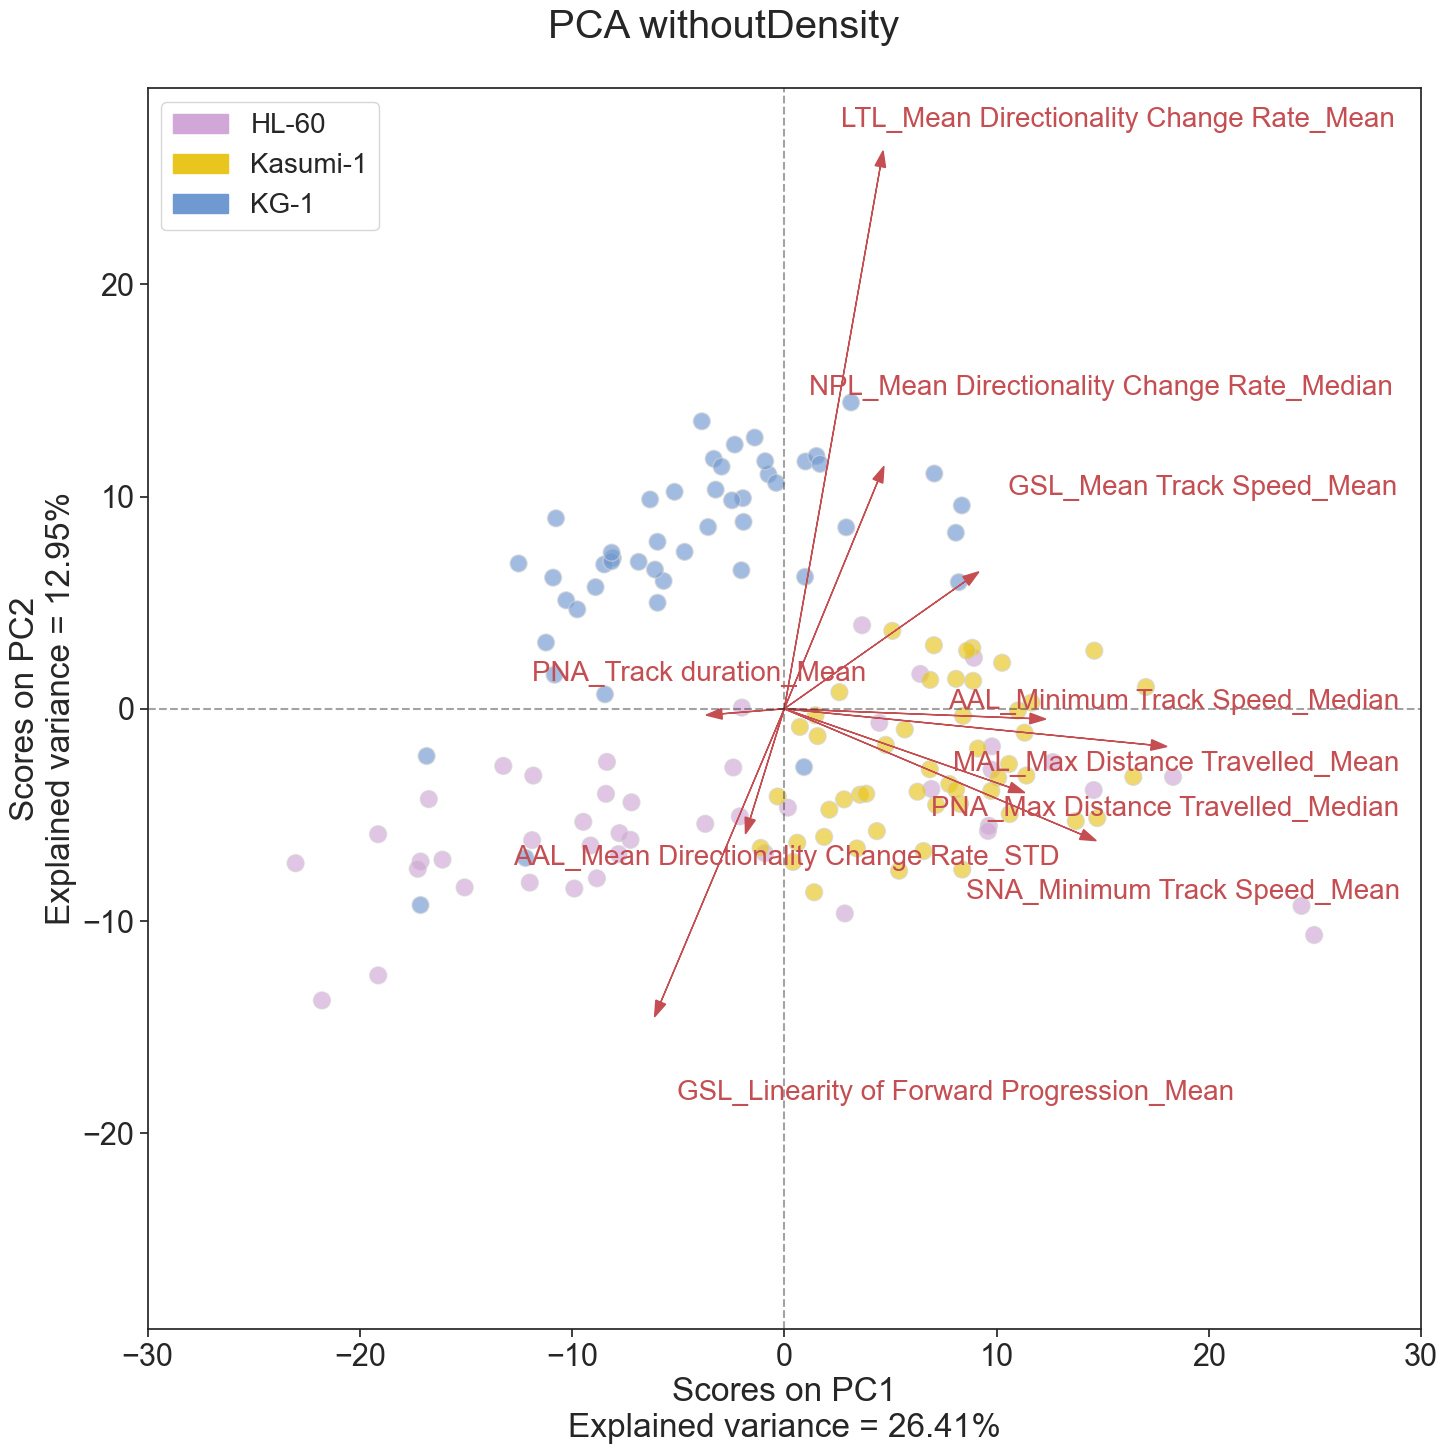

In [30]:
## PCA BIPLOT ##
fig, ax = plt.subplots(1, figsize=(15,15))
sns.set_theme(style="ticks", font_scale=2)
# fig.suptitle("PCA without the \"Density\" feature") # NOTE: change title when changing the dataset
fig.suptitle('PCA '+string)

# Plot scores
f = sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='label', palette=colorDict, ax=ax, alpha=0.65, s=150, edgecolor='lightgrey')
ax.axhline(0, linestyle='--', color='k', alpha=0.4) # horizontal lines
ax.axvline(0, linestyle='--', color='k', alpha=0.4) # vertical lines
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('Scores on PC1\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[0]*100,2))+'%', fontsize=24)
plt.ylabel('Scores on PC2\nExplained variance = '+str(np.round(pcaTotal.explained_variance_ratio_[1]*100,2))+'%', fontsize=24)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(title='Cell type')

# Plot loadings
[plt.arrow(0,0,loadingsDF.iloc[i,0]*200, loadingsDF.iloc[i,1]*200, color='r', alpha=1, length_includes_head=True, head_width=0.5) for i in range(nFeatures)] # Multiply by 200 so the arrows are visible in the scores scale
texts = [plt.text(loadingsDF.iloc[line,0]*200, loadingsDF.iloc[line,1]*200, loadingsDF.index[line], horizontalalignment='left', size='small', color='r') for line in range(nFeatures)] # Add annotation to the loadings
adjust_text(texts) # add arrows to the plot: , arrowprops=dict(arrowstyle='->', color='red'), , only_move='y'


#### forced legend ####
values = ['#D0A7D6', '#E9C61D', '#7099D1']
keys = ['HL-60', 'Kasumi-1', 'KG-1']
patch = [(mpatches.Patch(color=values[i], label=keys[i])) for i in range(len(colorDict))] # Markers are rectangles
plt.legend(handles = patch, fontsize=20, loc='upper left') # plot legend
##################################

fig.tight_layout()
fig1 = plt.gcf() #Get current fig to save it later (plt.show creates a new figure)
plt.show()

In [32]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
fig.savefig('PCA'+"/"+'biplot'+string+".svg", transparent=True, dpi=500, bbox_inches='tight')

C:\Users\20210014\AppData\Local\Temp\ipykernel_27696\453639009.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figElbow.show()


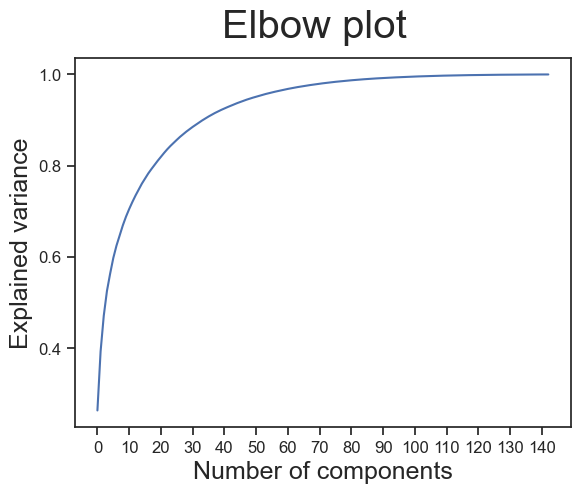

In [31]:
## Elbow plot ##
figElbow, ax = plt.subplots()

ax.set(xticks=np.arange(0, pcaTotal.components_.shape[0], 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.plot(np.cumsum(pcaTotal.explained_variance_ratio_)) # Elbow plot: explained variance by each component

plt.xlabel('Number of components', fontsize=18)
plt.ylabel('Explained variance', fontsize=18)
figElbow.suptitle("Elbow plot")
figElbow.show()

In [33]:
## Save figure ##
Path('PCA').mkdir(parents=True, exist_ok=True)
figElbow.savefig('PCA'+"/"+'elbowPlot'+string+".png", transparent=True, dpi=500, bbox_inches='tight')